<a href="https://colab.research.google.com/github/anton-akulenko/HW02-DS/blob/main/DS_HW02_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Частина третя: Аналіз датасет c Kaggle.com**




Прочитайте csv файл (використовуйте функцію read_csv)

Виведіть перші п'ять рядків (використовується функція head)

Виведіть розміри датасету (використовуйте атрибут shape)

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


%matplotlib inline



books = pd.read_csv("bestsellers with categories.csv")

In [96]:
books.head(3)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction


In [97]:
books.shape

(550, 7)

In [98]:
print(f"Про скільки книг зберігає дані датасет? \n Dataset has {books['Name'].unique().shape[0]} unique books")

Про скільки книг зберігає дані датасет? 
 Dataset has 351 unique books


Для спрощення подальшої роботи давайте трохи підправимо назви змінних. Як бачите, тут усі назви починаються з великої літери, а одна - навіть містить пробіл. Це дуже небажано і може бути досить незручним. Давайте змінимо регістр на малий, а пробіл замінимо на нижнє підкреслення (snake_style). А заразом і вивчимо корисний атрибут датафрейму: columns (можна просто присвоїти список нових імен цьому атрибуту)

In [99]:
books.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
books.head(3)

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction


**Первинне дослідження даних**

---


Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)<br>
Відповідь: Чи є в якихось змінних пропуски? (Так / ні)<br>
Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)<br>
Відповідь: Які є унікальні жанри?<br>
Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')<br>
Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)<br>
Відповідь: Максимальна ціна?<br>
Відповідь: Мінімальна ціна?<br>
Відповідь: Середня ціна?<br>
Відповідь: Медіанна ціна?<br>

In [100]:
print(f"чи у всіх рядків вистачає даних? \n{books.isna().sum()}\n\nЧи є в якихось змінних пропуски?")
if books.isna().sum()[1] == 0:
  print("No missing data")
else:
  print("Some data missing")

чи у всіх рядків вистачає даних? 
name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

Чи є в якихось змінних пропуски?
No missing data


In [101]:
print(" Які є унікальні жанри?")
print(books.genre.unique())

 Які є унікальні жанри?
['Non Fiction' 'Fiction']


Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')


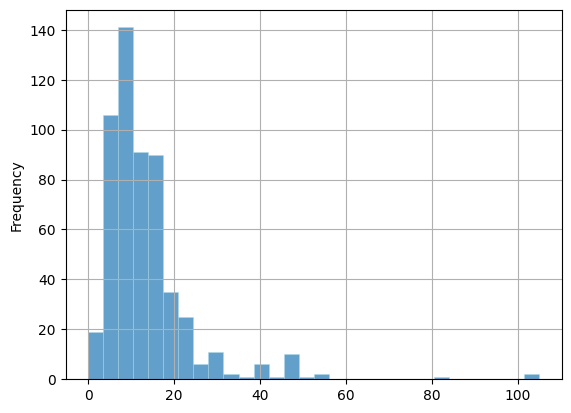

In [102]:
fig, ax = plt.subplots()
ax = books.price.plot.hist(bins=30, alpha=0.7, linewidth=0.5, edgecolor="lightblue", grid=True)

plt.show()

In [103]:
books.agg({"price" : ["max", "min", "mean", "median"]})

,price
max,105.0
min,0.0
mean,13.1
median,11.0


**Пошук та сортування даних**


In [104]:
top_rate = books.user_rating.max()

top_rate_count = books[books['user_rating'] == top_rate].shape[0]

top_rate_count_u = books.name[books['user_rating'] == top_rate].unique().shape[0]

top_2015 = books[books['year'] == 2015]
most_exp_2015 = top_2015[top_2015.price == top_2015.price.max()][['name', 'price']]

top_50_fiction_2010 = books.name[(books.year == 2010) & (books.genre == 'Fiction')].shape[0]

rate49_2010_2011 = books[(books['user_rating'] == 4.9) & ((books['year'] == 2010 | 2011))].shape[0]
sort_2015_lt_8 = top_2015[top_2015['price'] < 8][['name', 'price']].sort_values(by='price', ascending=False)



print(f"""
Відповідь: Який рейтинг у датасеті найвищий? Відповідь: {top_rate}\n
Відповідь: Скільки книг мають такий рейтинг? Відповідь: {top_rate_count} unique: {top_rate_count_u}\n
Відповідь: Яка книга має найбільше відгуків? Відповідь: \n{books[books.reviews == books.reviews.max()][['name', 'reviews']]}\n
Відповідь: З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? Відповідь: \n{most_exp_2015}\n
Відповідь: Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? Відповідь: \n{top_50_fiction_2010}\n
Відповідь: Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? Відповідь: {rate49_2010_2011}\n
І насамкінець, давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values).\n
{sort_2015_lt_8}\n
Відповідь: Яка книга остання у відсортованому списку? Відповідь: \n{sort_2015_lt_8.iloc[-1]['name']}
""")


Відповідь: Який рейтинг у датасеті найвищий? Відповідь: 4.9

Відповідь: Скільки книг мають такий рейтинг? Відповідь: 52 unique: 28

Відповідь: Яка книга має найбільше відгуків? Відповідь: 
                        name  reviews
534  Where the Crawdads Sing    87841

Відповідь: З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? Відповідь: 
                                                  name  price
277  Publication Manual of the American Psychologic...     46

Відповідь: Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? Відповідь: 
20

Відповідь: Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? Відповідь: 1

І насамкінець, давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values).

                                                  name  price

**Агрегування даних та з'єднання таблиць**

Для початку давайте подивимося на максимальну та мінімальну ціни для кожного з жанрів (використовуйте функції groupby та agg, для підрахунку мінімальних та максимальних значень використовуйте max та min). Не беріть усі стовпці, виберіть тільки потрібні вам

In [105]:
result = books.groupby("genre").agg({"price": ["min", "max"]})
result

price     
              min  max
genre                 
Fiction         0   82
Non Fiction     0  105

Відповідь: Максимальна ціна для жанру Fiction: Відповідь

Відповідь: Мінімальна ціна для жанру Fiction: Відповідь

Відповідь: Максимальна ціна для жанру Non Fiction: Відповідь

Відповідь: Мінімальна ціна для жанру Non Fiction: Відповідь

In [106]:
print(f"""
Максимальна ціна для жанру Fiction: Відповідь {result.iloc[0]['price']['max']}\n
Мінімальна ціна для жанру Fiction: Відповідь {result.iloc[0]['price']['min']}\n
Максимальна ціна для жанру Non Fiction: Відповідь {result.iloc[1]['price']['max']}\n
Мінімальна ціна для жанру Non Fiction: Відповідь {result.iloc[1]['price']['min']}\n
""")


Максимальна ціна для жанру Fiction: Відповідь 82

Мінімальна ціна для жанру Fiction: Відповідь 0

Максимальна ціна для жанру Non Fiction: Відповідь 105

Мінімальна ціна для жанру Non Fiction: Відповідь 0




Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів (використовуйте функції groupby та agg, для підрахунку кількості використовуйте count). Не беріть усі стовпці, виберете тільки потрібні

In [107]:
result_cnt = books.groupby("author", as_index=False).agg(cnt = ('author', 'count')).sort_values(by='cnt', ascending=False)
result_cnt

,author,cnt
120,Jeff Kinney,12
92,Gary Chapman,11
226,Suzanne Collins,11
197,Rick Riordan,11
11,American Psychological Association,10
...,...,...
61,David Grann,1
143,Larry Schweikart,1
62,David McCullough,1
141,Khaled Hosseini,1


Відповідь: Якої розмірності вийшла таблиця? Відповідь:

Відповідь: Який автор має найбільше книг? Відповідь:

Відповідь: Скільки книг цього автора? Відповідь:

In [108]:
print(f"""
Якої розмірності вийшла таблиця? Відповідь: {result_cnt.shape}\n

Який автор має найбільше книг? Відповідь: {result_cnt['author'].iloc[0]}\n

Скільки книг цього автора? Відповідь: {result_cnt.cnt.iloc[0]}
      """)


Якої розмірності вийшла таблиця? Відповідь: (248, 2)


Який автор має найбільше книг? Відповідь: Jeff Kinney


Скільки книг цього автора? Відповідь: 12
      


Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора (використовуйте функції groupby та agg, для підрахунку середнього значення використовуйте mean). Не беріть усі стовпці, виберете тільки потрібні

In [109]:
result_mean = books.groupby("author", as_index=False).agg(avg_rating = ('user_rating', 'mean')).sort_values(by='avg_rating', ascending=False)
result_mean

,author,avg_rating
178,Patrick Thorpe,4.9
146,Lin-Manuel Miranda,4.9
41,Chip Gaines,4.9
215,Sherri Duskey Rinker,4.9
173,Nathan W. Pyle,4.9
...,...,...
180,Paula Hawkins,4.1
171,Muriel Barbery,4.0
100,Gillian Flynn,4.0
90,Gallup,4.0


Відповідь: У якого автора середній рейтинг мінімальний? Відповідь:

Відповідь: Який у цього автора середній рейтинг? Відповідь:



In [110]:
print(f"""
У якого автора середній рейтинг мінімальний? Відповідь: {result_mean['author'].iloc[-1]}\n

Скільки книг цього автора? Відповідь: {result_mean.avg_rating.iloc[-1]}
      """)


У якого автора середній рейтинг мінімальний? Відповідь: Donna Tartt


Скільки книг цього автора? Відповідь: 3.9
      


З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг (Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну

In [111]:
df_union = pd.concat([result_cnt, result_mean.avg_rating], axis=1)
df_union

,author,cnt,avg_rating
120,Jeff Kinney,12,4.800000
92,Gary Chapman,11,4.736364
226,Suzanne Collins,11,4.663636
197,Rick Riordan,11,4.772727
11,American Psychological Association,10,4.500000
...,...,...,...
61,David Grann,1,4.600000
143,Larry Schweikart,1,4.600000
62,David McCullough,1,4.700000
141,Khaled Hosseini,1,4.300000


Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values)



In [112]:
df_union.sort_values(by=["cnt", "avg_rating"], ascending=True)

,author,cnt,avg_rating
171,Muriel Barbery,1,4.000000
186,Pierre Dukan,1,4.100000
43,Chris Cleave,1,4.100000
109,Ian K. Smith M.D.,1,4.100000
198,Rob Bell,1,4.200000
...,...,...,...
11,American Psychological Association,10,4.500000
226,Suzanne Collins,11,4.663636
92,Gary Chapman,11,4.736364
197,Rick Riordan,11,4.772727


Відповідь: Який автор перший у списку?



In [113]:
df_union.iloc[0]

author        Jeff Kinney
cnt                    12
avg_rating            4.8
Name: 120, dtype: object

Візуалізація
Для кожного з попередніх завдань:

Hw2.1.ipynb
Hw2.2.ipynb
Hw2.3.ipynb
додайте від 3 до 5 графіків функцій різного типу на ваш вибір. Задайте графікам оформлення, щоб кожен графік у своїй домашній роботі чимось відрізнявся і не був схожим на інші. Можна використовувати як matplotlib, так і seaborn.

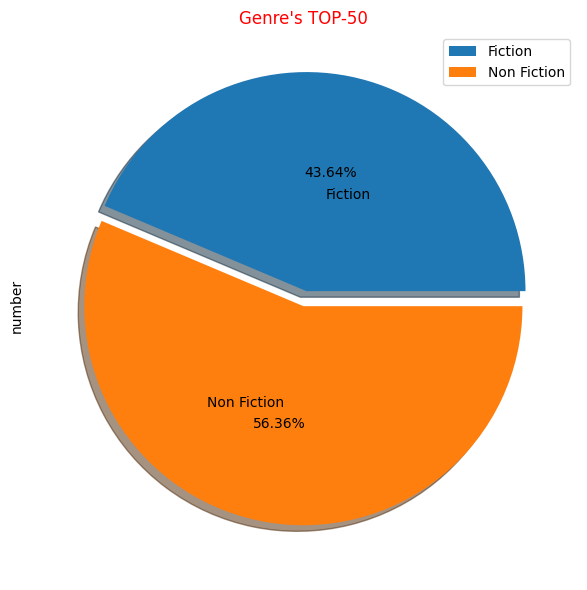

In [114]:
genres = books.groupby('genre')\
    .agg(number = ('name' , 'count'))\
    .plot.pie(y='number',
              figsize=(6, 6),
              legend=True,
              shadow=True,
              explode=[0.07, 0],
              autopct="%.2f%%",
              pctdistance=0.55,
              labeldistance=0.45,
              )
plt.title("Genre's TOP-50", color = 'r')
plt.tight_layout()

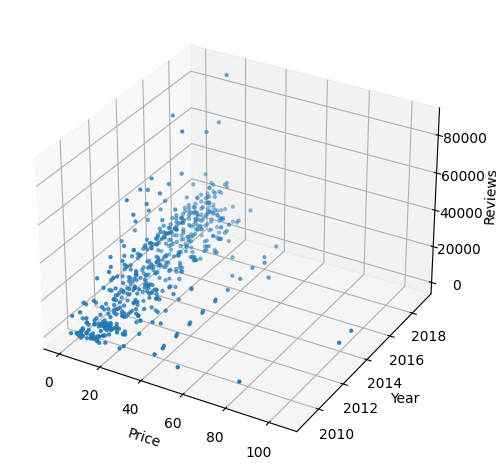

In [115]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")

ax.scatter(books.price,
           books.year,
           books.reviews,
           s= books.user_rating)

ax.set_xlabel('Price')
ax.set_ylabel('Year')
ax.set_zlabel('Reviews')
plt.tight_layout()
plt.show()

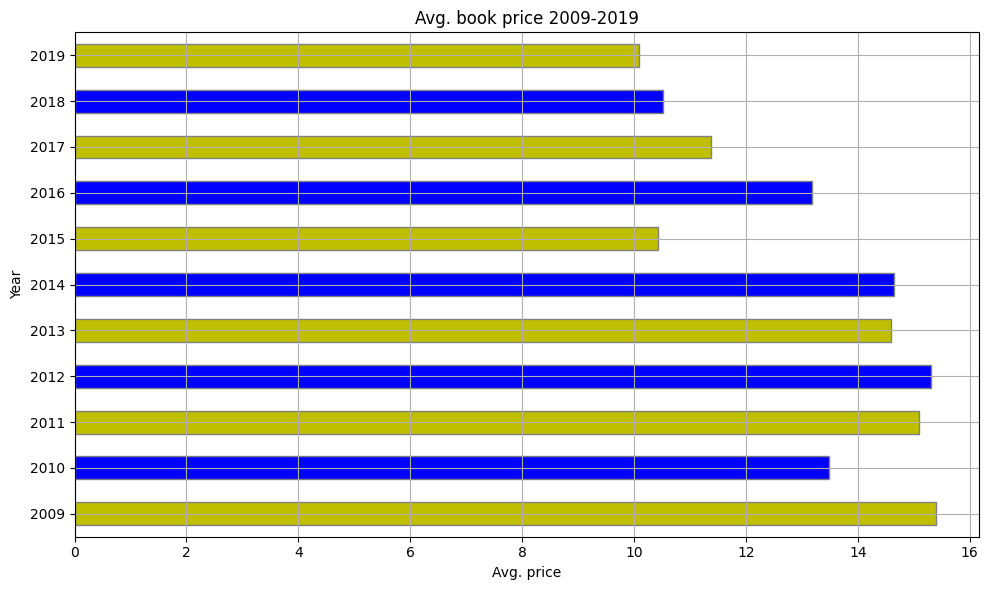

In [116]:
avg_price_per_year = books.groupby("year")["price"].mean()

color = ['y', 'b']
plt.figure(figsize=(10, 6))
avg_price_per_year.plot(kind="barh", color=color, edgecolor="grey", grid=True)
plt.xlabel("Avg. price")
plt.ylabel("Year")
plt.title("Avg. book price 2009-2019")
plt.tight_layout()
plt.show()